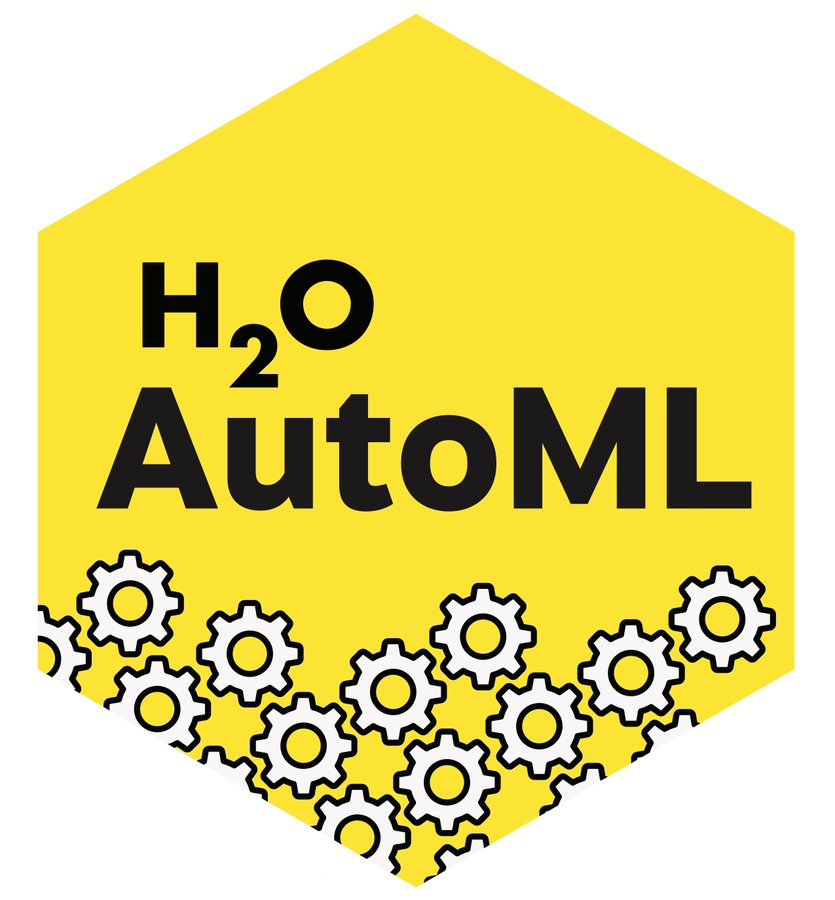

[H20: Training-models](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/training-models.html)

# Classification

In [23]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
#from tqdm import tqdm

## Initialize

In [24]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321.

.... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.391-b13, mixed mode)
  Starting server from C:\Users\Marco\miniconda3\envs\h20\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Marco\AppData\Local\Temp\tmp3n7mg5oz
  JVM stdout: C:\Users\Marco\AppData\Local\Temp\tmp3n7mg5oz\h2o_Marco_started_from_python.out
  JVM stderr: C:\Users\Marco\AppData\Local\Temp\tmp3n7mg5oz\h2o_Marco_started_from_python.err
  Server is running at http://127.0.0.1:54351
Connecting to H2O server at http://127.0.0.1:54351 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,7 months and 7 days
H2O_cluster_name:,H2O_from_python_Marco_9iovmz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.382 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [32]:
import h2o
print(h2o.__version__)

3.40.0.4


## Train & test

`from df to H2OFrame`

`from H20Frame to df`

```python
path = "../../../Downloads/heart_disease_clean.csv"
df = pd.read_csv(path)

train, test = train_test_split(df, test_size=0.2, random_state=42)

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)
```

`importing your own`

In [25]:
path = "../../../Downloads/heart_disease_clean.csv"
df = pd.read_csv("C:/Users/Marco/Desktop/IronHack/projects/final_project/Data/t_model.csv")

train, test = train_test_split(df, test_size=0.2, random_state=42)

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


`example_dataset`

In [4]:
# Import a sample binary outcome train/test set into H2O
#train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
#test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

In [26]:
# Identify predictors and response
X = train.columns
y = "ad_price"
X.remove(y)

## Processing of features

In [6]:
# # For binary classification, response should be a factor
# train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

## Fit

In [7]:
# Run AutoML for 20 base models
# automl = H2OAutoML(max_models=3, seed=1)
# automl.train(x=X, y=y, training_frame=train)

# # View the AutoML Leaderboard
# lb = automl.leaderboard
# lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
# lb

In [27]:
# Run AutoML for 20 base models
automl = H2OAutoML(max_models=10, seed=1)
automl.train(x=X, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = automl.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
lb

AutoML progress: |
10:33:16.630: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231206_103316,50708.5,2.57135e+09,36933.2,0.228064,2.57135e+09
StackedEnsemble_BestOfFamily_1_AutoML_1_20231206_103316,50817.6,2.58243e+09,36937.5,0.228583,2.58243e+09
DRF_1_AutoML_1_20231206_103316,51762.5,2.67936e+09,36436.3,0.23193,2.67936e+09
GBM_4_AutoML_1_20231206_103316,52366,2.7422e+09,38917.9,0.233928,2.7422e+09
GBM_grid_1_AutoML_1_20231206_103316_model_1,52699.3,2.77722e+09,39385.7,0.236321,2.77722e+09
GBM_3_AutoML_1_20231206_103316,53110.6,2.82074e+09,39940.3,0.23731,2.82074e+09
GBM_2_AutoML_1_20231206_103316,53845.3,2.89932e+09,40693.7,0.240644,2.89932e+09
GBM_5_AutoML_1_20231206_103316,53863,2.90122e+09,40690.9,0.240526,2.90122e+09
GBM_1_AutoML_1_20231206_103316,54034.4,2.91971e+09,40880.9,0.241716,2.91971e+09
DeepLearning_1_AutoML_1_20231206_103316,57771.7,3.33756e+09,43938.5,nan,3.33756e+09


In [29]:
# # Run AutoML for 20 base models
# automl = H2OAutoML(max_models=25, seed=1)
# automl.train(x=X, y=y, training_frame=train)

# # View the AutoML Leaderboard
# lb = automl.leaderboard
# lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
# lb

## ROC

In [30]:
m = h2o.get_model('StackedEnsemble_AllModels_1_AutoML_1_20231206_103316')
m

key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/10
# GBM base models (used / total),4/6
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
automl.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_1_20230606_144532,0.840638,0.234425,0.356812,0.296456,0.261593,0.068431
StackedEnsemble_BestOfFamily_1_AutoML_1_20230606_144532,0.840407,0.234538,0.356678,0.289028,0.261625,0.0684476
GBM_5_AutoML_1_20230606_144532,0.840055,0.234971,0.353127,0.298241,0.261926,0.0686051
GBM_grid_1_AutoML_1_20230606_144532_model_2,0.839978,0.234964,0.356124,0.290867,0.261771,0.068524
GBM_2_AutoML_1_20230606_144532,0.839748,0.235318,0.349769,0.293547,0.262193,0.0687449
GBM_3_AutoML_1_20230606_144532,0.838827,0.235831,0.34825,0.292832,0.262481,0.0688963
XGBoost_3_AutoML_1_20230606_144532,0.838613,0.235606,0.350826,0.290462,0.262287,0.0687947
XGBoost_grid_1_AutoML_1_20230606_144532_model_3,0.837791,0.236153,0.34734,0.298738,0.262606,0.0689618
GLM_1_AutoML_1_20230606_144532,0.836965,0.236751,0.351372,0.29856,0.262597,0.0689573
GBM_4_AutoML_1_20230606_144532,0.835931,0.237826,0.338516,0.295491,0.263639,0.0695055


In [ ]:
[i for i in dir(automl.leaderboard) if "_" not in i]

['abs',
 'acos',
 'acosh',
 'all',
 'any',
 'anyfactor',
 'apply',
 'ascharacter',
 'asfactor',
 'asin',
 'asinh',
 'asnumeric',
 'atan',
 'atanh',
 'bottomN',
 'categories',
 'cbind',
 'ceil',
 'columns',
 'concat',
 'cor',
 'cos',
 'cosh',
 'cospi',
 'countmatches',
 'cummax',
 'cummin',
 'cumprod',
 'cumsum',
 'cut',
 'day',
 'dayOfWeek',
 'describe',
 'detach',
 'difflag1',
 'digamma',
 'dim',
 'distance',
 'drop',
 'dtype',
 'entropy',
 'exp',
 'expm1',
 'fillna',
 'flatten',
 'floor',
 'gamma',
 'getrow',
 'grep',
 'gsub',
 'head',
 'hist',
 'hour',
 'idxmax',
 'idxmin',
 'ifelse',
 'impute',
 'interaction',
 'isax',
 'ischaracter',
 'isfactor',
 'isin',
 'isna',
 'isnumeric',
 'isstring',
 'key',
 'kurtosis',
 'levels',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'lstrip',
 'match',
 'max',
 'mean',
 'median',
 'melt',
 'merge',
 'min',
 'minute',
 'mktime',
 'moment',
 'month',
 'mult',
 'nacnt',
 'names',
 'nchar',
 'ncol',
 'ncols',
 'nlevels',
 'nrow',
 'nrows',
 'pivot

In [ ]:
best_model = automl.leader

In [ ]:
pred_df.rename({"No":0, "Yes":1}, axis=1, inplace=True)

In [ ]:
pred_df

,predict,No,Yes
0,No,0.960480,0.039520
1,No,0.819976,0.180024
2,No,0.987216,0.012784
3,No,0.824274,0.175726
4,No,0.992303,0.007697
...,...,...,...
60339,No,0.894493,0.105507
60340,No,0.986943,0.013057
60341,No,0.992389,0.007611
60342,Yes,0.693385,0.306615


In [ ]:
predictions = best_model.predict(test)

# Convert H2OFrame to pandas DataFrame
pred_df = predictions.as_data_frame()

probabilities = pred_df['Yes'].values
actuals = test[y].as_data_frame().values.flatten()

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(actuals, probabilities)

# Compute the AUC (Area Under the ROC Curve)
area_under_curve = auc(fpr, tpr)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


ValueError: y_true takes value in {'No', 'Yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % area_under_curve)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Export & importing

In [ ]:
!open .

In [ ]:
model_path = "./"

`exporting`

In [31]:
exported = h2o.save_model(m, path = "", force=True)
exported

'C:\\Users\\Marco\\Downloads\\StackedEnsemble_AllModels_1_AutoML_1_20231206_103316'

`saved_model`

In [ ]:
saved_model = h2o.load_model(exported)

## Predict

`predict with a sample`

In [ ]:
def select_row_to_predict (test, row):
    df = test.as_data_frame()
    df_sample = df[df.index == df.loc[row][0]]
    h2o_data = h2o.H2OFrame(df_sample)
    return h2o_data

In [ ]:
path = "../../../Downloads/heart_disease_clean.csv"
df = pd.read_csv(path)

train, test = train_test_split(df, test_size=0.2, random_state=42)

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


`p0 and p1, probability of getting each category`

In [ ]:
row = select_row_to_predict (test, 0)
row

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


H2OFrame is empty.